In [1]:
import pandas as pd
from datetime import datetime, timedelta
import sys
sys.path.append('/Users/luoyonggui/PycharmProjects/mayiutils_n1/mayiutils/db')
from pymongo_wrapper import PyMongoWrapper

In [4]:
mongo = PyMongoWrapper()

In [2]:
stock_series = pd.read_pickle('/Users/luoyonggui/PycharmProjects/mayifactories/finance/data/stock_dict.pkl')

In [25]:
start_date = datetime.now() - timedelta(days=5*365)

In [26]:
ll = ['东方航空', '南方航空']

In [27]:
# 基准
table = mongo.getCollection('finance', '000001.SH')
df = mongo.findAll(table, {'trade_date': {'$gte': start_date}}, fieldlist=['trade_date', 'pct_chg'],
                    sort=[('trade_date', 1)], returnFmt='df')
for i in ll:
    table = mongo.getCollection('finance', stock_series.loc[i])
    dft = mongo.findAll(table, {'trade_date': {'$gte': start_date}}, fieldlist=['trade_date', 'pct_chg'], returnFmt='df')
    df = pd.merge(df, dft, on='trade_date', how='left')

df = df.fillna(0)
df = df.set_index('trade_date')
for i in range(df.shape[1]):
    df.iloc[:, i] = (1+df.iloc[:, i]/100).cumprod()
df.columns = ['000001.SH'] + ll
# print(df.shape)
# print(df.head())
# print(df.tail())

# 计算近n日涨幅

# print(df1y)
# 近1周涨幅
df1w = pd.DataFrame(((df.iloc[-1] / df.iloc[-6]) - 1).sort_values(ascending=False))
df1w.reset_index(inplace=True)
df1w.columns = ['index_1w', '涨幅_1w']
# 近1月涨幅
df1m = pd.DataFrame(((df.iloc[-1] / df.iloc[-21]) - 1).sort_values(ascending=False))
# 近3月涨幅
df3m = pd.DataFrame(((df.iloc[-1] / df.iloc[-63]) - 1).sort_values(ascending=False))
# 近6月涨幅
df6m = pd.DataFrame(((df.iloc[-1] / df.iloc[-126]) - 1).sort_values(ascending=False))
# 近1年涨幅排序
df1y = pd.DataFrame((df.iloc[-1]-1).sort_values(ascending=False))
df1w['index_1m'] = df1m.index.tolist()
df1w['涨幅_1m'] = df1m.iloc[:, 0].values.tolist()
df1w['index_3m'] = df3m.index.tolist()
df1w['涨幅_3m'] = df3m.iloc[:, 0].values.tolist()
df1w['index_6m'] = df6m.index.tolist()
df1w['涨幅_6m'] = df6m.iloc[:, 0].values.tolist()
df1w['index_1y'] = df1y.index.tolist()
df1w['涨幅_1y'] = df1y.iloc[:, 0].values.tolist()


In [20]:
df1w

,index_1w,涨幅_1w,index_1m,涨幅_1m,index_3m,涨幅_3m,index_6m,涨幅_6m,index_1y,涨幅_1y
0,东方航空,0.027343,000001.SH,0.068168,000001.SH,0.036908,000001.SH,-0.046643,000001.SH,-0.126145
1,南方航空,0.022625,东方航空,0.027343,南方航空,-0.022118,东方航空,-0.133444,南方航空,-0.217678
2,000001.SH,0.021998,南方航空,0.027273,东方航空,-0.088391,南方航空,-0.200746,东方航空,-0.245436


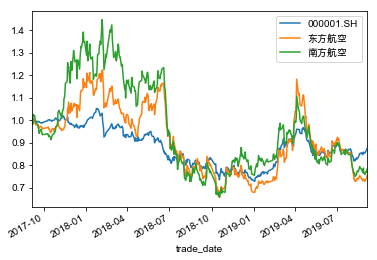

In [21]:
# 绘制近n日走势图
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
df.plot()
plt.show()

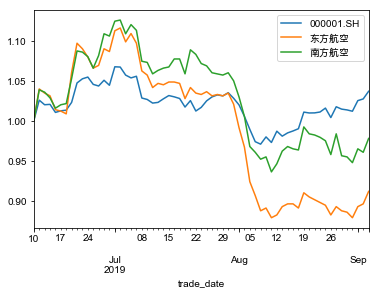

In [22]:
df3m = df.iloc[-63:]/df.iloc[-63]
df3m.plot()
plt.show()

In [28]:
df['t'] = df.南方航空 - df.东方航空

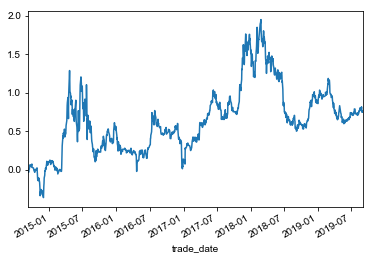

In [29]:
df['t'].plot()